In [1]:
import pandas as pd
import numpy as np
import keras
import talos as ta

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from talos.utils import metrics

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [5]:
from keras import backend as K

In [6]:
np.random.seed(0)

# Load the dataset 
were using the [Mammography Mass](http://archive.ics.uci.edu/ml/datasets/mammographic+mass) dataset from UCI Machine Learning Repository

In [7]:
df = pd.read_csv('~/DATA/mammographic_masses.data', na_values='?', names=['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'])

In [8]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [9]:
df.shape

(961, 6)

In [10]:
df.isna().sum()

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

According the the data description the 'BI-RADS' column is not predictive. We will drop this column along with any rows with missing values

In [11]:
df = df.drop('BI-RADS', axis=1)
df.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


In [12]:
no_nan_df = df.dropna()
no_nan_df.shape

(831, 5)

In [13]:
no_nan_df.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
8,57.0,1.0,5.0,3.0,1
10,76.0,1.0,4.0,3.0,1


# Split data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(no_nan_df.iloc[:,:4], no_nan_df.iloc[:,4], train_size=0.6)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5)

In [15]:
X_val.head()

,Age,Shape,Margin,Density
149,41.0,1.0,1.0,3.0
340,46.0,4.0,3.0,3.0
326,37.0,2.0,1.0,2.0
68,45.0,2.0,1.0,3.0
518,23.0,1.0,1.0,3.0


In [16]:
y_train.head()

265    0
668    1
564    1
269    1
894    0
Name: Severity, dtype: int64

# Scale the data

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

# Set up the keras model as Baseline (without Talos)

In [18]:
K.clear_session()
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=4))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy', metrics.precision, metrics.recall, metrics.f1score]
)

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


# Train your model

In [20]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100
                   )

Instructions for updating:
Use tf.cast instead.
Train on 498 samples, validate on 166 samples
Epoch 1/100
498/498 [==============================] - 0s 731us/step - loss: 0.7549 - acc: 0.4900 - precision: 0.4980 - recall: 0.9607 - f1score: 0.6513 - val_loss: 0.7645 - val_acc: 0.4880 - val_precision: 0.5043 - val_recall: 0.9321 - val_f1score: 0.6509
Epoch 2/100
498/498 [==============================] - 0s 149us/step - loss: 0.7149 - acc: 0.4920 - precision: 0.4999 - recall: 0.9547 - f1score: 0.6508 - val_loss: 0.7308 - val_acc: 0.4880 - val_precision: 0.5042 - val_recall: 0.9105 - val_f1score: 0.6453
Epoch 3/100
498/498 [==============================] - 0s 200us/step - loss: 0.6845 - acc: 0.5100 - precision: 0.5086 - recall: 0.9240 - f1score: 0.6552 - val_loss: 0.7046 - val_acc: 0.5301 - val_precision: 0.5282 - val_recall: 0.8864 - val_f1score: 0.6587
Epoch 4/100
498/498 [==============================] - 0s 193us/step - loss: 0.6609 - acc: 0.6145 - precision: 0.5755 - recall: 0.8775 

Epoch 32/100
498/498 [==============================] - 0s 194us/step - loss: 0.4693 - acc: 0.7831 - precision: 0.7590 - recall: 0.8451 - f1score: 0.7949 - val_loss: 0.5078 - val_acc: 0.7711 - val_precision: 0.7572 - val_recall: 0.8339 - val_f1score: 0.7895
Epoch 33/100
498/498 [==============================] - 0s 53us/step - loss: 0.4672 - acc: 0.7871 - precision: 0.7611 - recall: 0.8482 - f1score: 0.7964 - val_loss: 0.5060 - val_acc: 0.7711 - val_precision: 0.7572 - val_recall: 0.8339 - val_f1score: 0.7895
Epoch 34/100
498/498 [==============================] - 0s 56us/step - loss: 0.4652 - acc: 0.7831 - precision: 0.7495 - recall: 0.8355 - f1score: 0.7872 - val_loss: 0.5043 - val_acc: 0.7711 - val_precision: 0.7572 - val_recall: 0.8339 - val_f1score: 0.7895
Epoch 35/100
498/498 [==============================] - 0s 192us/step - loss: 0.4636 - acc: 0.7831 - precision: 0.7557 - recall: 0.8443 - f1score: 0.7928 - val_loss: 0.5027 - val_acc: 0.7711 - val_precision: 0.7572 - val_recall:

Epoch 64/100
498/498 [==============================] - 0s 190us/step - loss: 0.4394 - acc: 0.7972 - precision: 0.7818 - recall: 0.8441 - f1score: 0.8064 - val_loss: 0.4816 - val_acc: 0.7831 - val_precision: 0.7658 - val_recall: 0.8446 - val_f1score: 0.7999
Epoch 65/100
498/498 [==============================] - 0s 187us/step - loss: 0.4389 - acc: 0.7992 - precision: 0.7820 - recall: 0.8465 - f1score: 0.8099 - val_loss: 0.4813 - val_acc: 0.7831 - val_precision: 0.7658 - val_recall: 0.8446 - val_f1score: 0.7999
Epoch 66/100
498/498 [==============================] - 0s 196us/step - loss: 0.4386 - acc: 0.7972 - precision: 0.7838 - recall: 0.8406 - f1score: 0.8046 - val_loss: 0.4808 - val_acc: 0.7831 - val_precision: 0.7658 - val_recall: 0.8446 - val_f1score: 0.7999
Epoch 67/100
498/498 [==============================] - 0s 192us/step - loss: 0.4383 - acc: 0.7972 - precision: 0.7808 - recall: 0.8306 - f1score: 0.7993 - val_loss: 0.4806 - val_acc: 0.7831 - val_precision: 0.7658 - val_recal

Epoch 96/100
498/498 [==============================] - 0s 201us/step - loss: 0.4301 - acc: 0.8153 - precision: 0.7955 - recall: 0.8590 - f1score: 0.8237 - val_loss: 0.4740 - val_acc: 0.7831 - val_precision: 0.7659 - val_recall: 0.8470 - val_f1score: 0.8023
Epoch 97/100
498/498 [==============================] - 0s 189us/step - loss: 0.4300 - acc: 0.8072 - precision: 0.7879 - recall: 0.8557 - f1score: 0.8171 - val_loss: 0.4739 - val_acc: 0.7831 - val_precision: 0.7659 - val_recall: 0.8470 - val_f1score: 0.8023
Epoch 98/100
498/498 [==============================] - 0s 204us/step - loss: 0.4298 - acc: 0.8133 - precision: 0.7935 - recall: 0.8617 - f1score: 0.8212 - val_loss: 0.4738 - val_acc: 0.7831 - val_precision: 0.7659 - val_recall: 0.8470 - val_f1score: 0.8023
Epoch 99/100
498/498 [==============================] - 0s 194us/step - loss: 0.4295 - acc: 0.8112 - precision: 0.7893 - recall: 0.8585 - f1score: 0.8191 - val_loss: 0.4736 - val_acc: 0.7831 - val_precision: 0.7659 - val_recal

In [21]:
try:
    %store history
except:
    %store -r history

Stored 'history' (History)


# Ploting the training curves

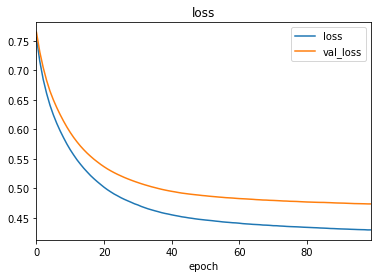

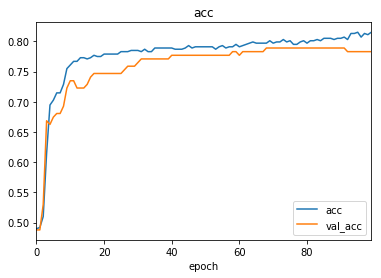

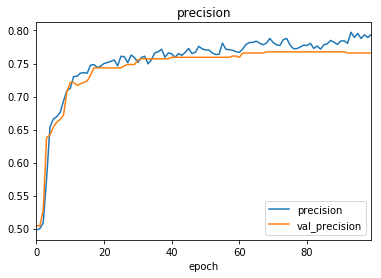

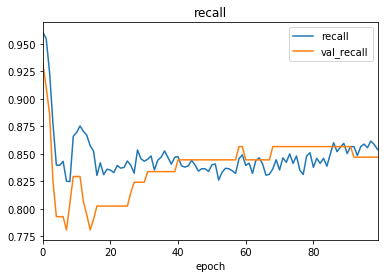

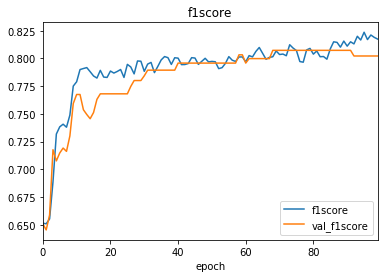

In [22]:
hdf = pd.DataFrame(data=history.history)
for col in ['loss', 'acc', 'precision', 'recall', 'f1score']:
    ax = hdf[[col, 'val_'+col]].plot()
    _ = ax.set_xlabel('epoch')
    _ = ax.set_title(col)

In [23]:
print("""test loss: %.2f
test accuracy: %.2f
test precision: %.2f
test recall: %.2f
test f1score: %.2f
""" % tuple(model.evaluate(X_test, y_test)))

167/167 [==============================] - 0s 26us/step
test loss: 0.51
test accuracy: 0.78
test precision: 0.66
test recall: 0.87
test f1score: 0.75



# [Talos](https://autonomio.github.io/talos) for hyperparameter optimization
[Here](https://towardsdatascience.com/hyperparameter-optimization-with-keras-b82e6364ca53) is a really good article that goes into more detail 

There are 6 main components in a Talos workflow
* __Scan__ - Search a hyperparameter space
* __Analyze__ - Analyze the results of a search
* __Evaluate__ - Evaluate the performance of a model
* Predict - Make a prediction
* Deploy - Package the best performing model
* Restore - Restore a packaged model

We will focus on Scan, Analyze, and Evaluate

# Scan
Scan expects a few arguments. The main arguments are
1. The data to train on
2. A parameter space to search
3. A function that takes in a set of parameters and returns a trained model

# Defining your hyperparameter space
Talos has 2 ways to define values in the parameter dicionary.
* list - a list defines a set of discrete values to select from
* tuple - a tuple defines a range of values to select from (start, stop, nsteps)

In [24]:
params = {
    'L1_size': (2,8,6),
    'L1_activation': ['relu', 'elu'],
    'L2_size': (2,8,6),
    'L2_activation': ['relu', 'elu'],
    'learning_rate': list(np.logspace(-1, -6, 10))
}

# Defining your keras model
Talos expects a function that takes in
* training data (X, y)
* validation data (X_val, y_val)
* a parameter dictionary

We then link the value in the dictionary to the parameters in our model definition

The function must return the __output of the fit function (history)__ and the __model__ itself

In [25]:
def mammo_model(X, y, X_val, y_val, p):
    model = Sequential()
    model.add(Dense(p['L1_size'], activation=p['L1_activation'], input_dim=4))
    model.add(Dense(p['L2_size'], activation=p['L2_activation']))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer=SGD(lr=p['learning_rate']),
        metrics=['accuracy', metrics.precision, metrics.recall, metrics.f1score]
    )
    
    history = model.fit(X, y,
                    validation_data=(X_val, y_val),
                    epochs=25,
                    verbose=0
                )
    
    return history, model

# Execute Scan DO NOT RUN

In [26]:
h = ta.Scan(
    X_train,
    y_train,
    params,
    mammo_model,
    'Mammography',
    x_val=X_val,
    y_val=y_val,
    fraction_limit=0.1
)

100%|██████████| 144/144 [06:04<00:00,  2.54s/it]


In [27]:
try:
    %store h
except:
    %store -r h

Stored 'h' (Scan)


# Viewing your results

In [28]:
bestmodel = h.best_model(metric='val_f1score')

In [29]:
bestmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [30]:
h.data.sort_values('val_f1score', ascending=False)

,round_epochs,val_loss,val_acc,val_precision,val_recall,val_f1score,loss,acc,precision,recall,f1score,L1_activation,L1_size,L2_activation,L2_size,learning_rate
64,25,0.470275,0.819277,0.783266,0.916619,0.841561,0.478217,0.785141,0.742648,0.853987,0.791320,relu,2,elu,3,0.100000
83,25,0.445465,0.813253,0.773647,0.916619,0.836850,0.435552,0.801205,0.774182,0.861231,0.812766,relu,3,relu,4,0.100000
121,25,0.442795,0.813253,0.788348,0.885294,0.832582,0.428485,0.803213,0.787983,0.827638,0.801446,elu,6,relu,4,0.100000
133,25,0.454670,0.813253,0.786944,0.878753,0.828164,0.440279,0.793173,0.776781,0.814407,0.792695,relu,5,elu,2,0.100000
46,25,0.455901,0.807229,0.774227,0.892522,0.827317,0.443608,0.793173,0.770616,0.837048,0.798240,elu,5,elu,5,0.027826
79,25,0.448512,0.807229,0.773647,0.892522,0.827043,0.430351,0.799197,0.782516,0.844733,0.804819,elu,7,elu,4,0.100000
85,25,0.474400,0.807229,0.775185,0.890801,0.826694,0.457992,0.775100,0.745053,0.831844,0.780171,elu,4,elu,2,0.007743
88,25,0.513136,0.819277,0.805890,0.852936,0.826471,0.504649,0.789157,0.785949,0.815886,0.795025,elu,6,elu,3,0.002154
19,25,0.469778,0.801205,0.764467,0.904571,0.826430,0.460055,0.793173,0.757938,0.864820,0.804899,relu,2,elu,4,0.027826
115,25,0.455325,0.807229,0.780737,0.880474,0.824709,0.445643,0.795181,0.769708,0.841796,0.801040,elu,6,elu,5,0.027826


# Analyze
We can use analyze to see which hyperparameters have an effect on the performance

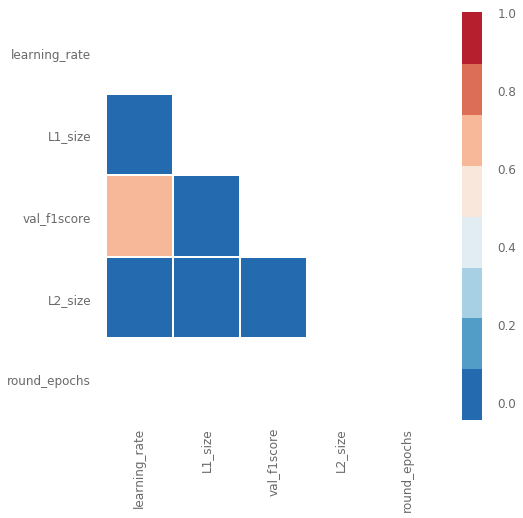

In [31]:
a = ta.Analyze(h)
a.plot_corr('val_f1score', ['loss', 'acc', 'precision', 'recall', 'f1score',
                            'val_loss', 'val_acc', 'val_precision', 'val_recall'])

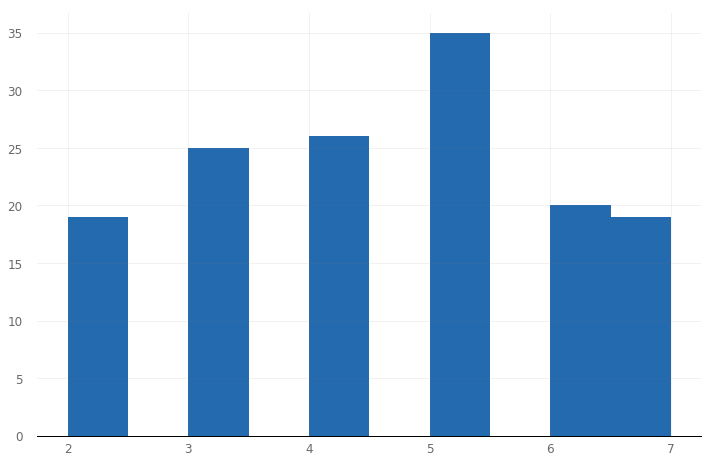

In [32]:
a.plot_hist('L2_size')

# Evaluate
Evaluate gives us the F1 score of the model evaluated on our test data. It split the data into 5 groups returns the 5 F1 scores. It also prints out the mean and standard deviation.

In [33]:
e = ta.Evaluate(h)
e.evaluate(np.array(X_test), np.array(y_test), 'binary', 'val_f1score', print_out=True)

mean : 0.72 
 std : 0.09


[0.7586206896551724,
 0.7272727272727272,
 0.5517241379310345,
 0.7894736842105263,
 0.7857142857142857]

In [34]:
bestmodel.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy', metrics.precision, metrics.recall, metrics.f1score]
)
print("""test loss: %.2f
test accuracy: %.2f
test precision: %.2f
test recall: %.2f
test f1score: %.2f
""" % tuple(bestmodel.evaluate(X_test, y_test)))

167/167 [==============================] - 0s 435us/step
test loss: 0.49
test accuracy: 0.74
test precision: 0.61
test recall: 0.88
test f1score: 0.72

